In [6]:
install.packages("rpart")       # performing regression trees
install.packages("rpart.plot")  # plotting regression trees
library(rpart)
library(rpart.plot)
library(tree)
library(MASS)

Warning message:
"package 'rpart' is in use and will not be installed"Warning message:
"package 'rpart.plot' is in use and will not be installed"Warning message:
"package 'MASS' was built under R version 3.6.3"

# Exercise 2 (Simulation Study):

The goal here is to think about how a regression tree makes its predictions and consequently when a regression
tree might yield a better result than other methods.
- Propose a dgp that will be well suited for analysis using regression trees and evaluate relevant properties
  in a small simulation study.
- Propose a dgp that will be well suited for analysis using the linear regression model (i.e. where the linear
  regression model is more likely to “beat" the regression tree method) and evaluate.
- Show how pruning reduces the variance of the regression tree prediction.

## Trees Versus Linear Models
Regression and classification trees have a very different flavor from the more classical approaches for regression and classification methods already discussed before. Which model is better? It depends on the problem at hand. If the relationship between the features and the response is well approximated by a linear model, then an approach such as linear regression will likely work well, and will outperform a method such as a regression tree that does not exploit this linear structure. If instead there is a highly non-linear and complex relationship between the features and the response, then decision trees may outperform classical approaches.

In [7]:
# We would propose a data generating process where y is dependent by 3 or 4 covariates, which many not be 
# a linear combination of these cavariates.

# Data generating process

dgp1 <- function(n){
  X1 <- rnorm(n, m, sd)
  X2 <- rnorm(n, m, sd)
  X3 <- rnorm(n, m, sd)
  X4 <- rnorm(n, m, sd)  
  eps <- rnorm(n, 0 ,1)
  yi <- 2* X1 * X2 + X3 + ((X4)^2) + eps
  data <- data.frame("yi" = yi, "X1" = X1, "X2" = X2,"X3" = X3, "X4" = X4, "eps" = eps)
  return(data)
}

node), split, n, deviance, yval
      * denotes terminal node

  1) root 100 14760.0   4.24200  
    2) X4 < -2.94081 10  1049.0  20.94000  
      4) X3 < 0.742181 5   348.6  28.01000 *
      5) X3 > 0.742181 5   201.1  13.87000 *
    3) X4 > -2.94081 90 10620.0   2.38700  
      6) X4 < 1.9792 77  7410.0   0.28820  
       12) X2 < -2.78723 5   366.1 -13.02000 *
       13) X2 > -2.78723 72  6097.0   1.21200  
         26) X1 < 2.9654 64  2621.0   0.07291  
           52) X2 < 2.24105 52   786.5   1.64900 *
           53) X2 > 2.24105 12  1146.0  -6.75800  
            106) X1 < -1.32497 7   250.3 -13.03000 *
            107) X1 > -1.32497 5   233.7   2.02700 *
         27) X1 > 2.9654 8  2728.0  10.33000 *
      7) X4 > 1.9792 13   858.5  14.82000  
       14) X4 < 3.50023 7   285.7   9.69200 *
       15) X4 > 3.50023 6   173.9  20.80000 *


Call:
lm(formula = yi ~ ., data = training_data)

Coefficients:
(Intercept)           X1           X2           X3           X4          eps  
     3.8133       0.8246       0.5451       0.7023      -0.2222       1.6498  


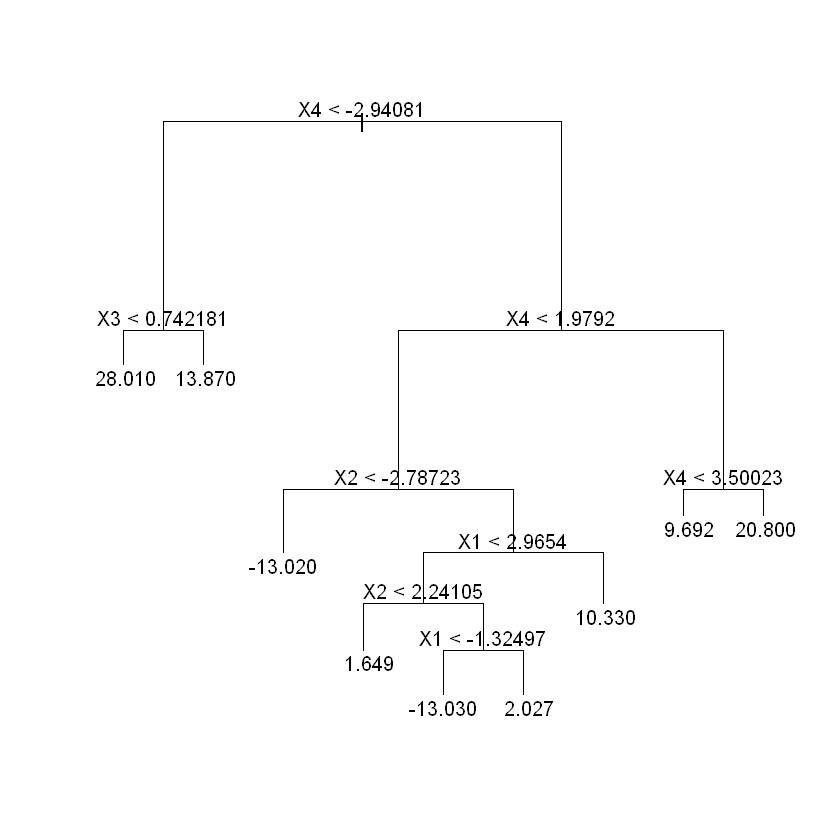

In [18]:
# Fitting a regression tree

n <- 200
m <- 0
sd <- 2

set.seed(122)

data <- dgp1(n)

train = sample(1:nrow(data), nrow(data)/2)
test = - train

training_data = data[train,]
test_data = data[test,]

train_tree <- tree(yi~., training_data)
train_tree
plot(train_tree)
text(train_tree, pretty=0)


# Fitting the linear model

train_lm <- lm(yi~., data = training_data)
train_lm





In [24]:
# Predicting the new data with the test data partion

test_tree <- predict(train_tree, newdata = test_data)
test_lm <- predict(train_lm, newdata = test_data)

#============calculating mse======================#
mse_tree <- mean((test_tree - test_data$yi) ^ 2)
mse_lm <- mean((test_lm - test_data$yi) ^ 2)
mse_tree
mse_lm

[1] 100.0595

[1] 122.5044